The following notebook is a perlimanry development of time series analysis using derivatives, especially for kinematics values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [4]:
sys.path.append('/home/ubuntu/git/mf_analysis')
sys.path.append('/home/ubuntu/git/mf_analysis/src/multiframe')

In [5]:
from mf_analyzer import MFAnalyzer

### Inputs

In [6]:
path = '/home/ubuntu/workspace/Omer/mf_analysis/stanch_las_cruces_10_fps__test/cametra_interface_output.tsv'

In [7]:
mfa = MFAnalyzer(path)

100%|██████████| 47/47 [00:00<00:00, 746.29it/s]


In [10]:
tracklet = mfa.longest_tracklet_by_label(0)

In [11]:
tracklet.uid

109

In [32]:
def plot_derivatives(age, x, title, unit):
    first_derivative = np.diff(x, n=1)
    second_derivative = np.diff(x, n=2)
    fig, ax = plt.subplots(2, 1, figsize=(12,8))
    ax[0].plot(age, x, '--bo', label=f'{title}')
    ax[0].set_xlabel('age')
    ax[0].set_ylabel(unit)
    ax[0].legend()
    ax[0].grid()
    ax[0].set_xticks(age)
    ax[1].plot(age[1:], first_derivative, '--go', label='first derivative')
    ax[1].plot(age[2:], second_derivative, '--ro', label=f'second derivative')
    ax[1].set_xlabel('age')
    ax[1].legend()
    ax[1].grid()
    ax[1].set_xticks(age)
    plt.show()
    

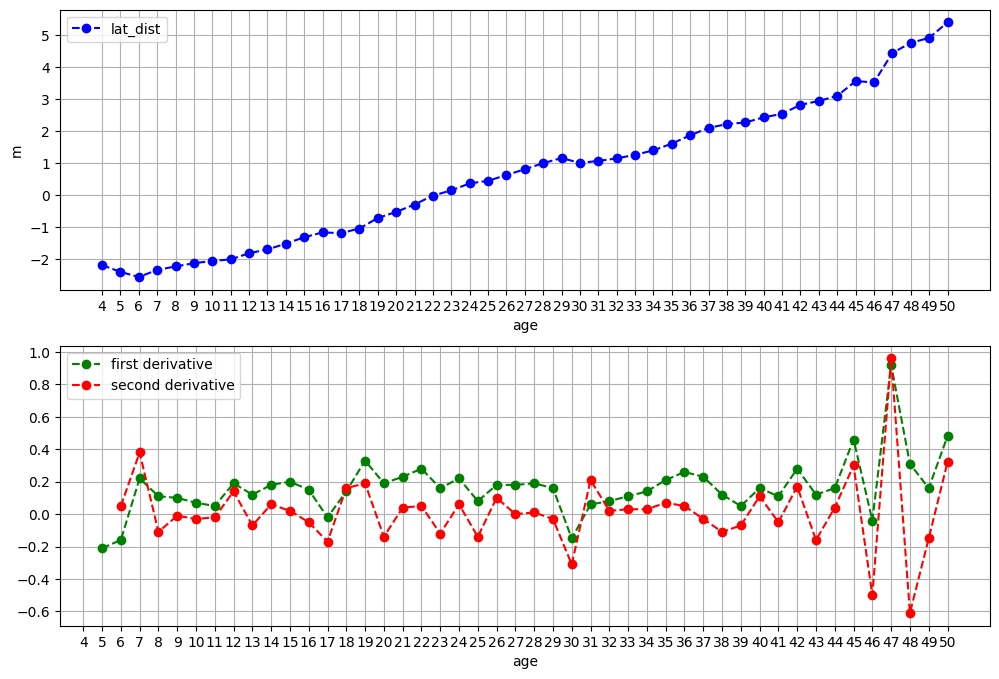

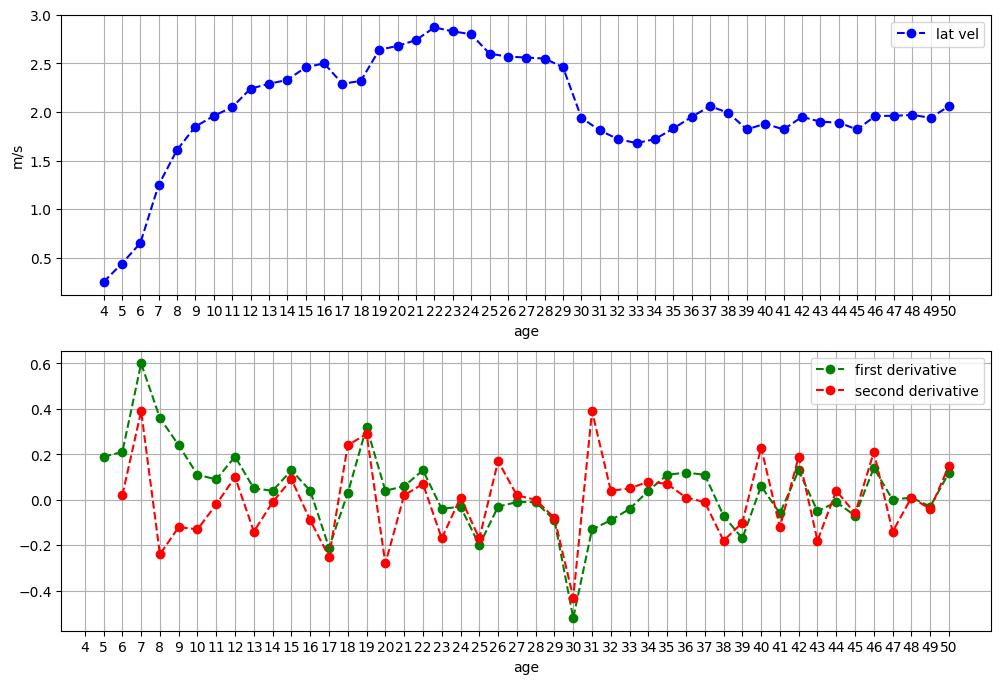

In [38]:
plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.lat_dist, 'lat_dist', 'm')
plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.abs_vel_x, 'lat vel', 'm/s')

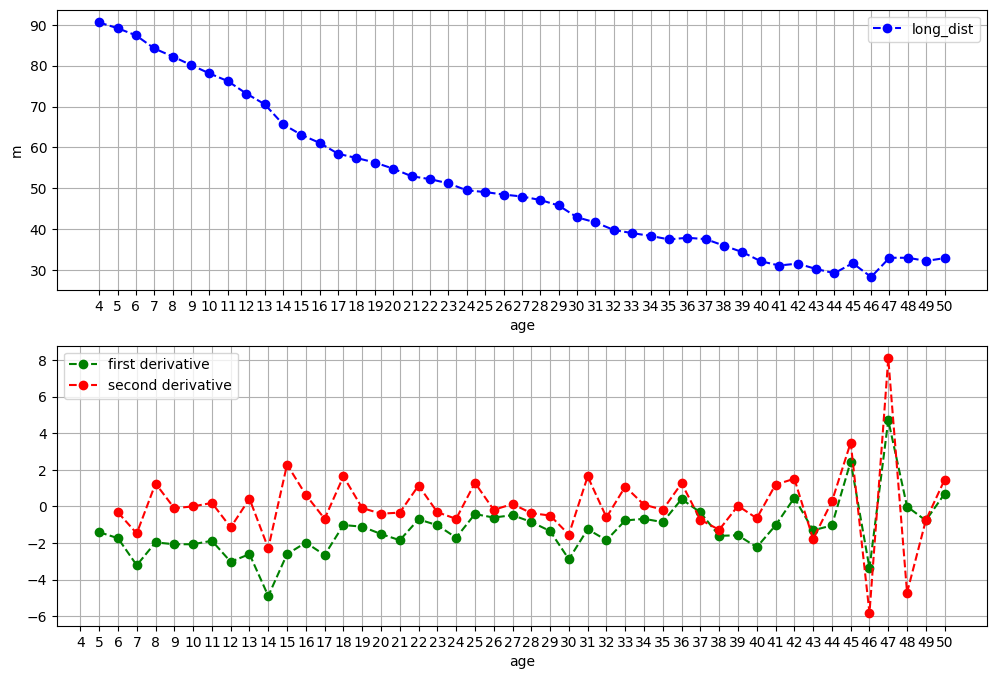

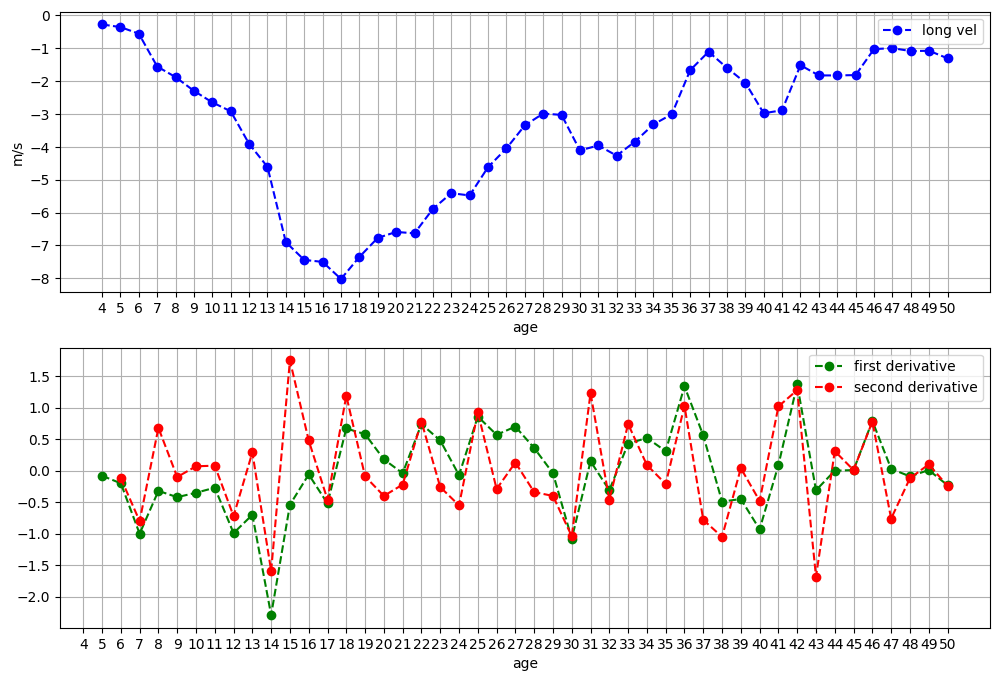

In [37]:
plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.long_dist, 'long_dist', 'm')
plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.abs_vel_z, 'long vel', 'm/s')